In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('Country-data.csv')

In [2]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [4]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
x=df.iloc[:,1:]


In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(x)
    wcss.append(data.inertia_)
print(wcss)

c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[117459687469.07816, 36528387934.3221, 21710210039.75414, 14610713446.535133, 10655378083.862543, 7655725089.094503, 5353767457.732321, 4258897193.751582, 3228565265.69808, 2669181672.0337477]


c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


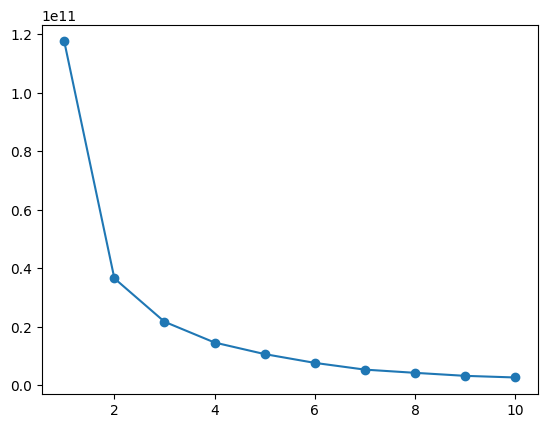

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss,marker='o')

In [9]:
data1=KMeans(n_clusters=6,init='k-means++',random_state=42)
data1.fit(x)
y_pred=data1.predict(x)
y_pred

c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 0, 5, 0, 0, 5, 1, 1, 0, 3, 3, 5, 0, 0, 1, 5, 5, 5, 5, 5, 0,
       0, 4, 0, 5, 5, 5, 5, 1, 5, 5, 5, 0, 5, 0, 5, 5, 5, 0, 5, 0, 3, 3,
       1, 0, 5, 5, 5, 3, 5, 0, 5, 1, 1, 0, 5, 5, 1, 5, 3, 0, 5, 5, 5, 5,
       5, 0, 1, 5, 5, 0, 0, 1, 3, 3, 5, 1, 5, 0, 5, 5, 4, 5, 5, 0, 0, 5,
       5, 3, 0, 2, 0, 5, 5, 0, 0, 5, 3, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       1, 3, 5, 5, 2, 3, 5, 0, 5, 5, 5, 0, 3, 2, 0, 0, 5, 5, 3, 5, 0, 0,
       5, 4, 3, 3, 5, 0, 3, 3, 5, 0, 5, 0, 1, 1, 5, 5, 0, 5, 5, 5, 5, 0,
       5, 5, 5, 4, 1, 1, 0, 5, 5, 0, 5, 5, 5])

In [10]:
x['clusters']=y_pred
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,5
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,5
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,5
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,5
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,5


In [11]:
x1=x.iloc[:,:-1].values
y1=x.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_trin,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
sv=SVC()
navi=GaussianNB()
lst=[knn,sv,navi]
for i in lst:
    print('model is ',i)
    i.fit(x_train,y_trin)
    y1_pred=i.predict(x_test)
    print('accurecy score is')
    print(accuracy_score(y_test,y1_pred))
    print(' report is')
    print(classification_report(y_test,y1_pred))
    print('*'*100)


model is  KNeighborsClassifier(n_neighbors=7)
accurecy score is
0.7843137254901961
 report is
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.67      1.00      0.80         4
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         2
           5       0.85      0.96      0.90        23

    accuracy                           0.78        51
   macro avg       0.56      0.58      0.55        51
weighted avg       0.74      0.78      0.75        51

****************************************************************************************************
model is  SVC()
accurecy score is
0.8431372549019608
 report is
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.80      1.00      0.89         4
           3       0.75      0.60      0.67         5
           4       0.00      0.00  

c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [15]:
print(sv.predict(scalar.transform(np.array([[90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,453]]))))

[5]
